# Logistic Regression - Heart Disease

## Objectives

This study uses the Logistic Regression Methods to predict if a patient has a heart disease or not based on the data available.

According to the dataset, the patient has a heart disease when target = 1 and not when target = 0.

### Dataset from:

https://www.kaggle.com/ronitf/heart-disease-uci

## Uploading the Data

In [1]:
# Let's start by importing the libraries used in this study
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings; warnings.simplefilter('ignore')

In [2]:
# Let's updolad the data and create our dataframe
df = pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Obs: Check the file 'README.MD' to read all of the columns definitions of the dataframe.

## Exploratory Data Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
# Creating a new target column for the EDA
df["Heart Disease"] = df["target"]
df["Heart Disease"] = df["Heart Disease"].replace(1, "Present")
df["Heart Disease"] = df["Heart Disease"].replace(0, "Not Present")

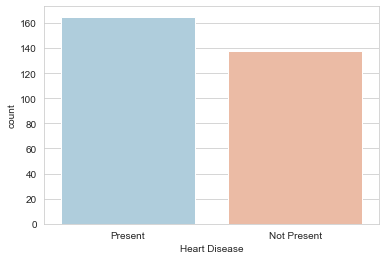

In [5]:
# Plotting new column created ('Heart Disease') for EDA
sns.set_style('whitegrid')
sns.countplot(x='Heart Disease',data=df,palette='RdBu_r')

In [6]:
# Creating a new gender column for the EDA
df["Gender"] = df["sex"]
df["Gender"] = df["Gender"].replace(1, "Male")
df["Gender"] = df["Gender"].replace(0, "Female")

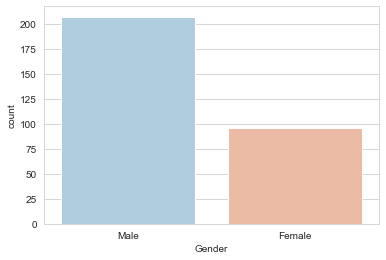

In [7]:
# Number of Males and Females in the Dataset
sns.countplot(x='Gender', data=df, palette="RdBu_r")
plt.xlabel("Gender")
plt.show()

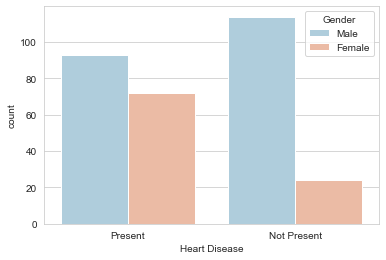

In [8]:
# Plotting the new gender column for EDA
sns.set_style('whitegrid')
sns.countplot(x='Heart Disease', hue='Gender', data=df, palette='RdBu_r')

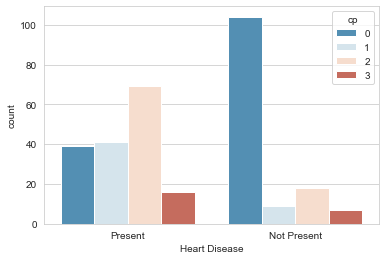

In [9]:
# Plotting the chest pain type column for EDA
sns.set_style('whitegrid')
sns.countplot(x='Heart Disease', hue='cp', data=df, palette='RdBu_r')

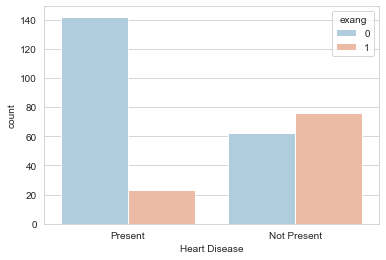

In [10]:
# Plotting the exercise induced angina column for EDA
sns.set_style('whitegrid')
sns.countplot(x='Heart Disease', hue='exang', data=df, palette='RdBu_r')

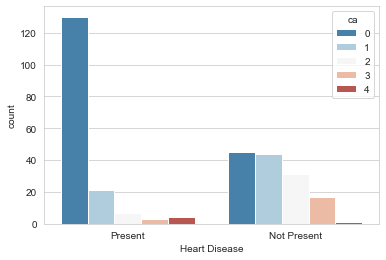

In [11]:
# Plotting the number of major vessels (0-3) colored by flourosopy column for EDA
sns.set_style('whitegrid')
sns.countplot(x='Heart Disease', hue='ca', data=df, palette='RdBu_r')

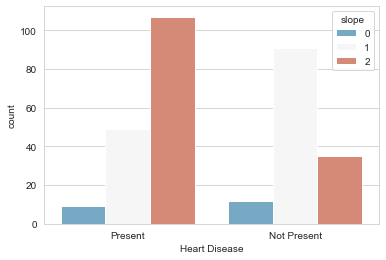

In [12]:
# Plotting the the slope of the peak exercise ST segment for EDA
sns.set_style('whitegrid')
sns.countplot(x='Heart Disease', hue='slope', data=df, palette='RdBu_r')

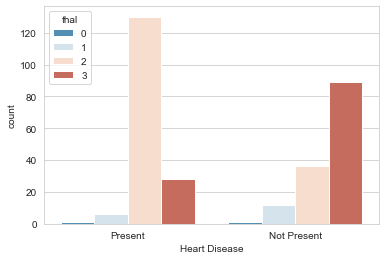

In [13]:
# Plotting the thaiL column for EDA
sns.set_style('whitegrid')
sns.countplot(x='Heart Disease', hue='thal', data=df, palette='RdBu_r')

In [14]:
# Let's delete the new columns created for the EDA in df
df.drop(['Heart Disease', 'Gender'], axis=1, inplace=True)

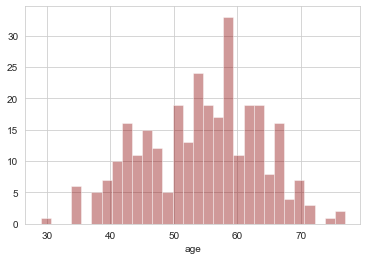

In [15]:
# Let's plot the age distribution
sns.distplot(df['age'],kde=False,color='darkred',bins=30)

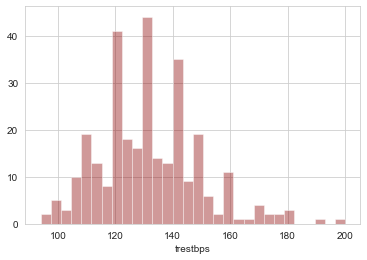

In [16]:
# Let's plot the resting blood pressure 
sns.distplot(df['trestbps'],kde=False,color='darkred',bins=30)

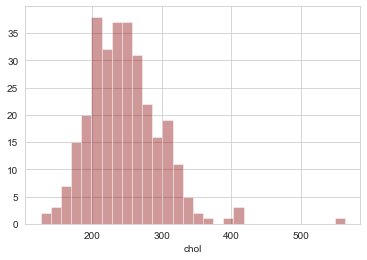

In [17]:
# Let's plot the serum cholestoral in mg/dl
sns.distplot(df['chol'],kde=False,color='darkred',bins=30)

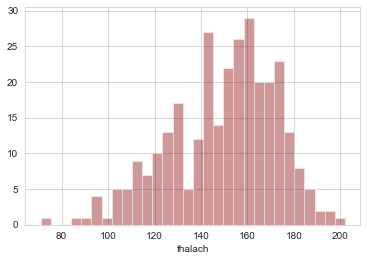

In [18]:
# Let's plot the maximum heart rate achieved
sns.distplot(df['thalach'],kde=False,color='darkred',bins=30)

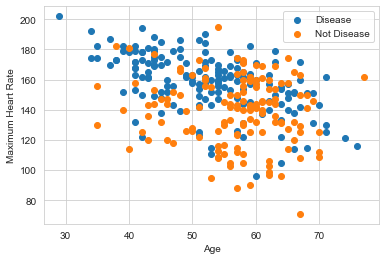

In [19]:
#Let's plot a scatter plot with the age versus the maximum heart rate.
plt.scatter(x=df['age'][df['target']==1], y=df['thalach'][(df['target']==1)])
plt.scatter(x=df['age'][df['target']==0], y=df['thalach'][(df['target']==0)])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

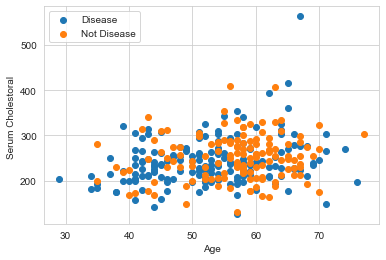

In [20]:
#Let's plot a scatter plot with the age versus the cholesterol.
plt.scatter(x=df['age'][df['target']==1], y=df['chol'][(df['target']==1)])
plt.scatter(x=df['age'][df['target']==0], y=df['chol'][(df['target']==0)])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Serum Cholestoral ")
plt.show()

## Building a Logistic Regression model
Let's start by splitting our data into a training set.

### Train Test Split

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('target', axis=1), df['target'], test_size=0.30)

## Training and Predicting

#### Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

In [25]:
predictions = logmodel.predict(X_test)

In [26]:
from sklearn.metrics import classification_report,confusion_matrix

We can check precision, recall, f1-score using classification report and also print the confusion matrix.

In [27]:
print('Classification Report')
print(classification_report(y_test,predictions))
print('\n')
print('Confusion Matrix')
print(confusion_matrix(y_test,predictions))

Classification Report
              precision    recall  f1-score   support

           0       0.82      0.78      0.80        36
           1       0.86      0.89      0.88        55

    accuracy                           0.85        91
   macro avg       0.84      0.83      0.84        91
weighted avg       0.85      0.85      0.85        91



Confusion Matrix
[[28  8]
 [ 6 49]]


#### K Nearest Neighbors

In [28]:
from sklearn.neighbors import KNeighborsClassifier

In [29]:
error_rate = []
# Let's check the best K value
for i in range(1,75):   
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

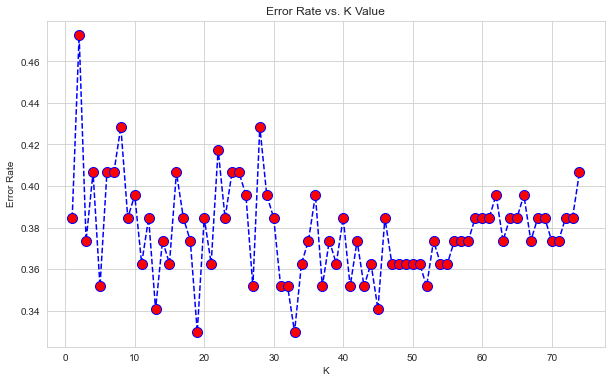

In [30]:
plt.figure(figsize=(10,6))
plt.plot(range(1,75),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Here we can see that that after arouns K= 9 the error rate just tends to hover around 0.30 
Let's retrain the model with that and check the classification report!

In [31]:
# NOW WITH K=9
knn = KNeighborsClassifier(n_neighbors=9)

knn.fit(X_train,y_train)
predictions = knn.predict(X_test)

print('Classification Report')
print(classification_report(y_test,predictions))
print('\n')
print('Confusion Matrix')
print(confusion_matrix(y_test,predictions))


Classification Report
              precision    recall  f1-score   support

           0       0.51      0.72      0.60        36
           1       0.75      0.55      0.63        55

    accuracy                           0.62        91
   macro avg       0.63      0.63      0.61        91
weighted avg       0.65      0.62      0.62        91



Confusion Matrix
[[26 10]
 [25 30]]


#### Decision Tree

In [32]:
from sklearn.tree import DecisionTreeClassifier

In [33]:
dtree = DecisionTreeClassifier()

In [34]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [35]:
predictions = dtree.predict(X_test)

In [36]:
print('Classification Report')
print(classification_report(y_test,predictions))
print('\n')
print('Confusion Matrix')
print(confusion_matrix(y_test,predictions))

Classification Report
              precision    recall  f1-score   support

           0       0.56      0.75      0.64        36
           1       0.79      0.62      0.69        55

    accuracy                           0.67        91
   macro avg       0.68      0.68      0.67        91
weighted avg       0.70      0.67      0.67        91



Confusion Matrix
[[27  9]
 [21 34]]


#### Random Forests

In [37]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [38]:
predictions = rfc.predict(X_test)

In [39]:
print('Classification Report')
print(classification_report(y_test,predictions))
print('\n')
print('Confusion Matrix')
print(confusion_matrix(y_test,predictions))

Classification Report
              precision    recall  f1-score   support

           0       0.76      0.81      0.78        36
           1       0.87      0.84      0.85        55

    accuracy                           0.82        91
   macro avg       0.82      0.82      0.82        91
weighted avg       0.83      0.82      0.82        91



Confusion Matrix
[[29  7]
 [ 9 46]]


### Conclusion

The best method was the simple logistic regression. It has a better precision, recall, f1-score and less false negatives/positives.